## Introduction to Modeling with Python

Now that we have seen some examples of modeling and using Python for modeling, we wanted to give you a chance to try your hand!

To that goal, we choose a well structured problem with plenty of resources online to help you along the way. That problem is predicting housing prices and is hosted on Kaggle:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

First, make sure you are signed up on Kaggle and then download the data:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

The data includes both testing and training sets as well as a sample submission file. 

Your goal is the predict the sales price for each house where root mean squared error is the evaluation metric. To get some ideas on where to start, feel free to check out Kaggle Kernels:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

And the discussion board:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion

Again - the goal of this homework is to get you exposed to modeling with Python. Feel free to use online resources to help guide you, but we expect original thought as well. Our hope is by the end of this homework you will feel comfortable exploring data in Python and building models to make predictions. Also please submit your test results to Kaggle and let us know your ranking and score!


### Grading

This homework is due **Feb. 21, 2019 by 4:00pm Utah time.** By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

Rubric:

* Code Quality - 10%
* Storytelling - 10%
* Result on Kaggle - 5%
* Describing, Cleaning, and Visualizing data - 25%
* Modeling - 50%

More specifically, for modeling we will look for: 

* Model Selection: Did you try multiple models? Why did you choose these models? How do they work? What are they assumptions? And how did you test/account for them? How did you select hyper-parameters?
* Model interpretation: What do the model results tell you? Which variables are important? High bias or variance and how did you / could you fix this? How confident are you in your results? 
* Model usefulness: Do you think your final model was useful? If so, how would you recommend using it? Convince us, that if we were a company, we would feel comfortable using your model with our users. Think about edge cases as well - are there certain areas that the model performs poorly on? Best on? How would you handle these cases, if say Zillow wanted to leverage your model realizing that bad recommendations on sale prices would hurt customer trust and your brand. This section also falls into the storytelling aspect of the grading.

## Introduction to Modeling with Python

Now that we have seen some examples of modeling and using Python for modeling, we wanted to give you a chance to try your hand!

To that goal, we choose a well structured problem with plenty of resources online to help you along the way. That problem is predicting housing prices and is hosted on Kaggle:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

First, make sure you are signed up on Kaggle and then download the data:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

The data includes both testing and training sets as well as a sample submission file. 

Your goal is the predict the sales price for each house where root mean squared error is the evaluation metric. To get some ideas on where to start, feel free to check out Kaggle Kernels:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

And the discussion board:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion

Again - the goal of this homework is to get you exposed to modeling with Python. Feel free to use online resources to help guide you, but we expect original thought as well. Our hope is by the end of this homework you will feel comfortable exploring data in Python and building models to make predictions. Also please submit your test results to Kaggle and let us know your ranking and score!


### Grading

This homework is due **Oct. 16, 2018 by 4:00pm Utah time.** By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

Rubric:

* Code Quality - 10%
* Storytelling - 10%
* Result on Kaggle - 5%
* Describing, Cleaning, and Visualizing data - 25%
* Modeling - 50%

More specifically, for modeling we will look for: 

* Model Selection: Did you try multiple models? Why did you choose these models? How do they work? What are they assumptions? And how did you test/account for them? How did you select hyper-parameters?
* Model interpretation: What do the model results tell you? Which variables are important? High bias or variance and how did you / could you fix this? How confident are you in your results? 
* Model usefulness: Do you think your final model was useful? If so, how would you recommend using it? Convince us, that if we were a company, we would feel comfortable using your model with our users. Think about edge cases as well - are there certain areas that the model performs poorly on? Best on? How would you handle these cases, if say Zillow wanted to leverage your model realizing that bad recommendations on sale prices would hurt customer trust and your brand. This section also falls into the storytelling aspect of the grading.

In [111]:
## Import needed libraries to perform cleaning, modeling and validation.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [15,8]

In [167]:
## Import train and test data, look for 
htrain = pd.read_csv('house_train.csv')
htest = pd.read_csv('house_test.csv')
hcols = htrain.columns
htrain.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Cleaning/Visualizing the Data

## Dealing with Anomalies

## Dealing with Null Values

In [168]:
## Grab columns of numerical and categorical features.
def get_feature_groups(df):
    ## Grab Numerical Features
    num_features = htrain.select_dtypes(include=['int64','float64']).columns
    
    ## Grab Categorical Features
    cat_features = htrain.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)
num_features, cat_features = get_feature_groups(htrain.drop(columns=['SalePrice']))

In [169]:
num_features.remove('SalePrice')
nulls_test = []
for i in range(len(num_features)):
    if htest[num_features[i]].isnull().any() == True:
        nulls_test.append(num_features[i])
for i in range(len(nulls_test)):
    htest.loc[htest[nulls_test[i]].isnull(),nulls_test[i]] = np.random.choice(htest.loc[htest[nulls_test[i]].isnull() == False,nulls_test[i]],len(htest.loc[htest[nulls_test[i]].isnull(),nulls_test[i]]))
print(htest.loc[:,nulls_num].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Empty DataFrameNone


In [171]:
## Find numerical columns with null values, then 
nulls_num = []
for i in range(len(num_features)):
    if htrain[num_features[i]].isnull().any() == True:
        nulls_num.append(num_features[i])
for i in range(len(nulls_num)):
    htrain.loc[htrain[nulls_num[i]].isnull(),nulls_num[i]] = np.random.choice(htrain.loc[htrain[nulls_num[i]].isnull() == False,nulls_num[i]],len(htrain.loc[htrain[nulls_num[i]].isnull(),nulls_num[i]]))
htrain.loc[:,nulls_num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Empty DataFrame

Only three numerical columns actually have null values, and after looking at the data and reading information
online, I will just include random variables into the null values.

In [79]:
## Find categorical columns with null values.
nulls_cat = []
for i in range(len(cat_features)):
    if htrain[cat_features[i]].isnull().any() == True:
        nulls_cat.append(cat_features[i])
htrain.loc[:,nulls_cat].info()
## Grab values to use.
ncols = ['Alley','FireplaceQu','PoolQC','Fence']
#htrain.drop(columns=ncols,inplace=True)
n = len(nulls_cat)
for i in range(n):
    if nulls_cat[i] in ncols:
        nulls_cat.remove(nulls_cat[i])
        i-=1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
Alley           91 non-null object
MasVnrType      1452 non-null object
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinType2    1422 non-null object
Electrical      1459 non-null object
FireplaceQu     770 non-null object
GarageType      1379 non-null object
GarageFinish    1379 non-null object
GarageQual      1379 non-null object
GarageCond      1379 non-null object
PoolQC          7 non-null object
Fence           281 non-null object
MiscFeature     54 non-null object
dtypes: object(16)
memory usage: 182.6+ KB


Column names Alley, FireplaceQu, Pool QC, and Fence have many null values. Thus we will take them out of
the training data set as they would be difficult to model around. We will keep MiscFeature and set the rest of the values to 'None' as they could be important to the selling value.

In [85]:
nulls_cat

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'MiscFeature']

Fill in remaining columns with null values to the mode of the given columns.

In [172]:
## Method 1: fill
for i in range(len(nulls_cat)):
    htrain.loc[htrain[nulls_cat[i]].isnull(),nulls_cat[i]] = np.random.choice(htrain.loc[htrain[nulls_cat[i]].isnull() == False,nulls_cat[i]],len(htrain.loc[htrain[nulls_cat[i]].isnull(),nulls_cat[i]]))
    #htrain.loc[htrain[nulls_cat[i]].isnull(),nulls_cat[i]] = [htrain[nulls_cat[i]].mode()]*len(htrain.loc[htrain[nulls_cat[i]].isnull(),nulls_cat[i]])
    

In [173]:
htrain.loc[:,nulls_cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
MasVnrType      1460 non-null object
BsmtQual        1460 non-null object
BsmtCond        1460 non-null object
BsmtExposure    1460 non-null object
BsmtFinType1    1460 non-null object
BsmtFinType2    1460 non-null object
Electrical      1460 non-null object
GarageType      1460 non-null object
GarageFinish    1460 non-null object
GarageQual      1460 non-null object
GarageCond      1460 non-null object
MiscFeature     1460 non-null object
dtypes: object(12)
memory usage: 137.0+ KB


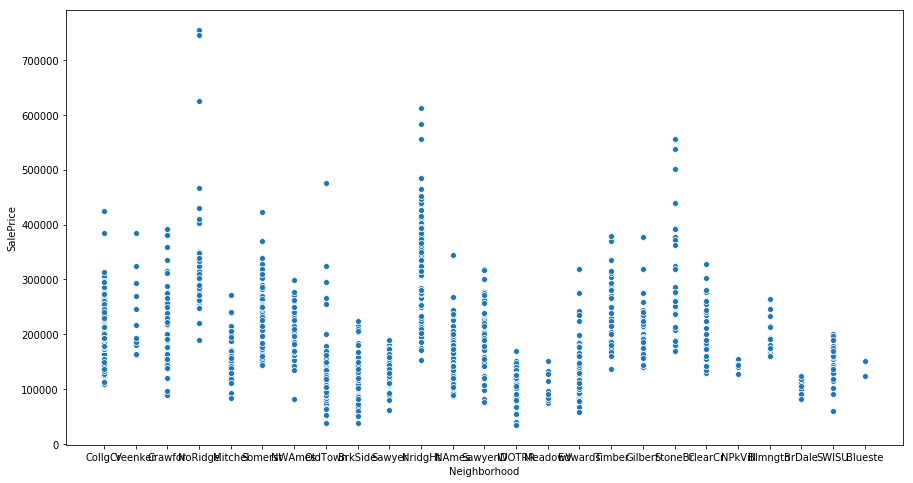

In [88]:
sns.scatterplot(htrain['Neighborhood'],htrain['SalePrice'])

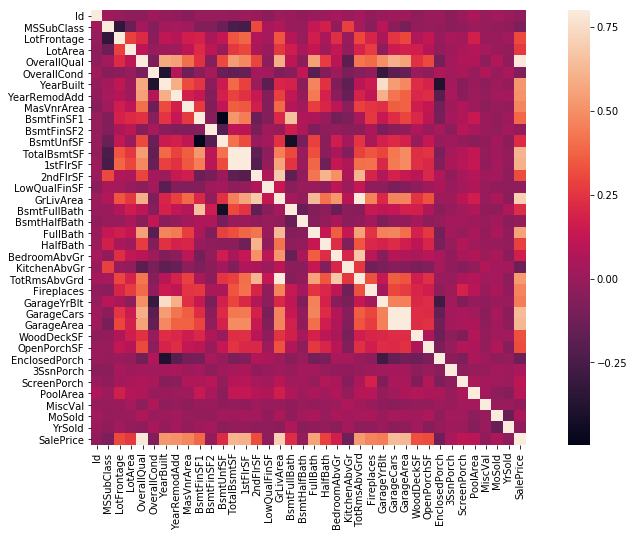

In [89]:
corr_mat = htrain.corr()
fig,ax = plt.subplots()
sns.heatmap(corr_mat,vmax=.8,square=True)

In [90]:
val = corr_mat['SalePrice'].sort_values(ascending=False)
mask = val 

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.474947
Fireplaces       0.466929
GarageYrBlt      0.450277
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
LotFrontage      0.304867
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

# Modeling

In [131]:
test_num_cols

In [133]:
X = htrain.loc[:,num_features]
Y = np.log(htrain['SalePrice'])
X_test = htest.loc[:,num_features]

In [153]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

## Linear Regression Model
scaler = StandardScaler()
scaler.fit(X)
scaled_df = scaler.transform(X)

linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
linear_regression_model.fit(scaled_df, Y)
predictions = linear_regression_model.predict(scaled_df)
mse = mean_squared_error(Y, predictions)
print(np.sqrt(mse))

scaler1 = StandardScaler()
scaler1.fit(X_test)
scaled_df1 = scaler.transform(X_test)
preds1 = linear_regression_model.predict(scaled_df1)
preds1 = np.exp(preds1)

0.14953365866764656


(Talk about results from previous problem)

In [161]:
## Compare it online
pd.DataFrame({'Id': X_test['Id'],'SalesPrice': preds1}).to_csv('housing_predictions.csv')

Actual Results for Linear Regression Model - RMSE: 0.14936

In [159]:
## Validation 

0       1461
1       1462
2       1463
3       1464
4       1465
5       1466
6       1467
7       1468
8       1469
9       1470
10      1471
11      1472
12      1473
13      1474
14      1475
15      1476
16      1477
17      1478
18      1479
19      1480
20      1481
21      1482
22      1483
23      1484
24      1485
25      1486
26      1487
27      1488
28      1489
29      1490
        ... 
1429    2890
1430    2891
1431    2892
1432    2893
1433    2894
1434    2895
1435    2896
1436    2897
1437    2898
1438    2899
1439    2900
1440    2901
1441    2902
1442    2903
1443    2904
1444    2905
1445    2906
1446    2907
1447    2908
1448    2909
1449    2910
1450    2911
1451    2912
1452    2913
1453    2914
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [155]:
len(preds1)

1459